Naive bayesian classifier
---

Watch video: How To Update Your Beliefs Systematically - Bayes’ Theorem

https://www.youtube.com/watch?v=R13BD8qKeTg

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns÷

In [2]:
# random data for two classes, with a shift in the center of the distribution
train_data = np.vstack((np.random.normal(size=(100, 2), loc=5),
                        np.random.normal(size=(100, 2), loc=7)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))

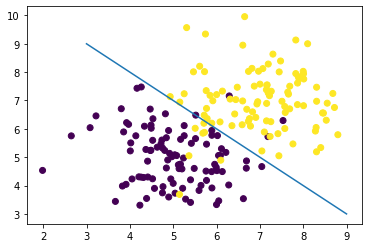

In [3]:
fig, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.plot(range(3, 10), range(9, 2, -1))
plt.show()

In [4]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [5]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [6]:
clf = GaussianNB()
clf.fit(train_data, train_labels)

GaussianNB()

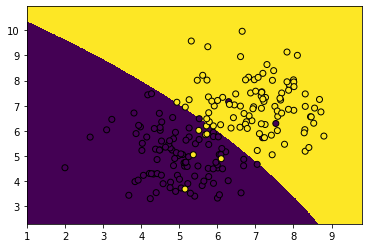

In [7]:
xs, ys = get_grid(train_data)

predicted = clf.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
plt.show()

In [8]:
clf = MultinomialNB()
clf.fit(train_data, train_labels)

MultinomialNB()

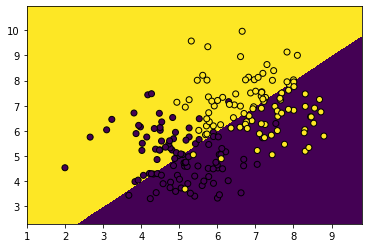

In [9]:
xs, ys = get_grid(train_data)

predicted = clf.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
plt.show()

First, we need to import the data. So let's get the collections from the github.

In [10]:
# !git clone https://github.com/matzim95/ML-datasets


In [11]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'../../ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

In [12]:
iris, iris_classes = load_dataset('iris', 'species')
print(iris_classes)
iris.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)
wine.head()

['one' 'two' 'three']


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [14]:
glass, glass_classes = load_dataset('glass', 'Type', 'ID')
print(glass_classes)
glass.head()

['building_windows_float_processed' 'building_windows_non_float_processed'
 'vehicle_windows_float_processed' 'containers' 'tableware' 'headlamps']


,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,class
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [15]:
# dataset selection
dataset = wine.copy()

 Then we need to separate the class as a separate label

In [16]:
y = dataset.pop('class')
X = dataset
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int8

### Normalization / standardization

In [18]:
from sklearn.preprocessing import Normalizer, StandardScaler

normalizer = Normalizer()
standardizer = StandardScaler()

In [19]:
preprocesser = normalizer

In [20]:
if preprocesser is not None:
    preprocesser.fit(X)
    X_preprocessed = preprocesser.transform(X.values)
    X[:] = X_preprocessed
X.head()

/Users/giedrius/anaconda3/envs/scipy/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


In [21]:
# Training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

We can now move on to defining the model and validating it

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [23]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)
y_mnb = mnb.predict(X_test)
print(y_test.values)
print(y_mnb)
print(confusion_matrix(y_test,y_mnb))

[1 2 2 2 0 2 0 1 0 2 0 2 0 0 2 2 1 0 2 0 1 2 0 1 1 1 2 0 1 0 1 1 2 2 2 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[ 0  0 12]
 [ 0  0 10]
 [ 0  0 14]]


In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gnb = GaussianNB()  # other classifier
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
print(y_test.values)
print(y_gnb)
print(confusion_matrix(y_test,y_gnb))

[1 2 2 2 0 2 0 1 0 2 0 2 0 0 2 2 1 0 2 0 1 2 0 1 1 1 2 0 1 0 1 1 2 2 2 0]
[1 1 2 2 0 2 0 1 0 2 0 2 0 0 2 2 1 0 2 0 1 2 0 1 1 1 2 0 1 0 1 1 2 1 2 0]
[[12  0  0]
 [ 0 10  0]
 [ 0  2 12]]


This way of comparing is not very clear, therefore we use metrics and error matrices.

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - results for each class separately
#   'binary' - for the label selected in `pos_label`
#   'micro' - for the total number of TP, FN, FP
#   'macro' - unweighted average for each class
#   'weighted' - weighted average for each class

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [27]:
print_results(calculate_metrics(y_test.values, y_gnb), 'GNB')
print_results(calculate_metrics(y_test.values, y_mnb), 'MNB')

Results for GNB
----
  Accuracy:  0.9444444444444444
  Precision: 0.9444444444444445
  Recall:    0.9523809523809524
  F1 score:  0.9440559440559441
  Mislabeled 2 out of 36


Results for MNB
----
  Accuracy:  0.3888888888888889
  Precision: 0.12962962962962962
  Recall:    0.3333333333333333
  F1 score:  0.18666666666666668
  Mislabeled 22 out of 36




/Users/giedrius/anaconda3/envs/scipy/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm_mnb = confusion_matrix(y_test, y_mnb)
cm_gnb = confusion_matrix(y_test, y_gnb)

print(cm_mnb)
print(cm_gnb)

[[ 0  0 12]
 [ 0  0 10]
 [ 0  0 14]]
[[12  0  0]
 [ 0 10  0]
 [ 0  2 12]]


In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # plot title
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    
    fig, ax = plt.subplots(figsize=(10,5))
    # draws CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # adds sidebar
    ax.figure.colorbar(img, ax=ax)
    # additions to the plot
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    # labels
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    
    return ax

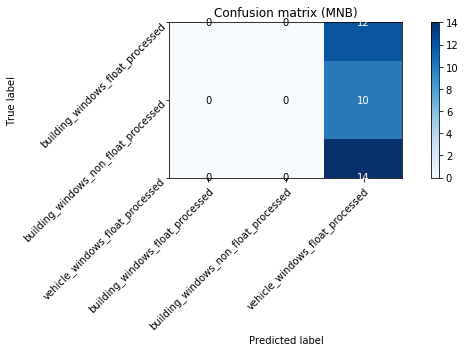

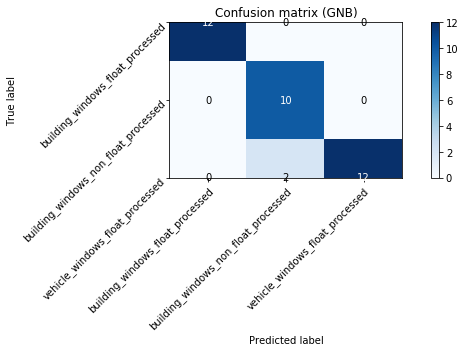

In [31]:
plot_confusion_matrix(cm_mnb, glass_classes, title_appendix='MNB')
plot_confusion_matrix(cm_gnb, glass_classes, title_appendix='GNB')
plt.show()

In [32]:
def normalize_confusion_matrix(confusion_matrix):
    return confusion_matrix.astype(
        'float') / confusion_matrix.sum(
        axis=1)[np.newaxis].T

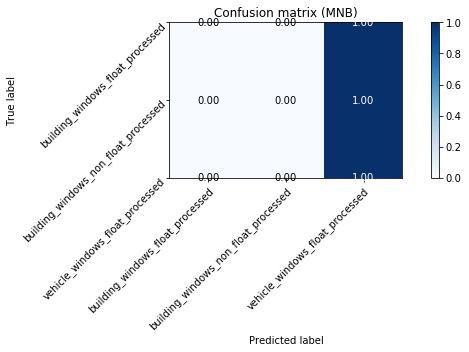

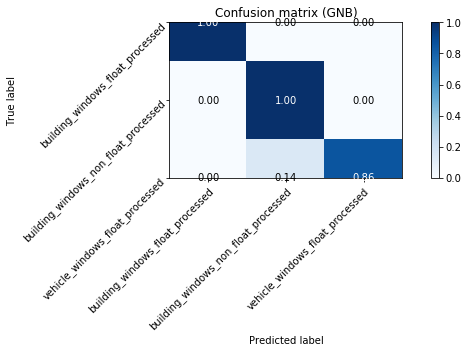

In [33]:
plot_confusion_matrix(normalize_confusion_matrix(cm_mnb),
                      glass_classes, title_appendix='MNB')
plot_confusion_matrix(normalize_confusion_matrix(cm_gnb),
                      glass_classes, title_appendix='GNB')
plt.show()

In [34]:
from sklearn.model_selection import KFold, StratifiedKFold

Results for GNB + CV
----
  Accuracy:  0.398876404494382
  Precision: 0.13295880149812733
  Recall:    0.3333333333333333
  F1 score:  0.19009370816599733
  Mislabeled 107 out of 178




/Users/giedrius/anaconda3/envs/scipy/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


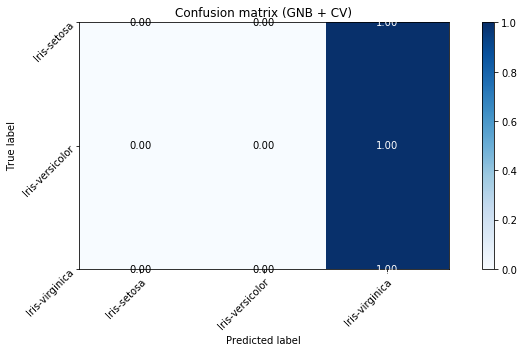

In [35]:
cross_val = StratifiedKFold(n_splits=5)#, shuffle=True)

predicted = []
target = []

for train_index, test_index in cross_val.split(X, y):
    mnbc = MultinomialNB()
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    mnbc.fit(X_train_cv, y_train_cv)
    predicted = np.concatenate((predicted, mnbc.predict(X_test_cv)))
    target = np.concatenate((target, y_test_cv))

print_results(calculate_metrics(target, predicted), 'GNB + CV')
cm_gnbc = confusion_matrix(target, predicted)

plot_confusion_matrix(normalize_confusion_matrix(cm_gnbc),
                      iris_classes, title_appendix='GNB + CV')
plt.show()

In [36]:
def cross_validate(classifier, kfold, X, y, params=None, talk=True):
    if params is None:
        params = {}
    if classifier.__class__.__name__ == 'ABCMeta':
        clf = classifier(**params)
    else:
        clf = classifier
    predicted = []
    target = []

    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf.fit(X=X_train, y=y_train)
        predicted = np.concatenate((predicted, clf.predict(X_test)))
        target = np.concatenate((target, y_test))
    
    metrics = calculate_metrics(target, predicted)
    cm = confusion_matrix(target, predicted)
    if talk:
        print_results(metrics, clf.__class__.__name__)
        plot_confusion_matrix(normalize_confusion_matrix(cm),
                              iris_classes,
                              title_appendix=clf.__class__.__name__)
        plt.show()
    else:
        return metrics, cm

In [37]:
X.shape

(178, 13)

Results for GaussianNB
----
  Accuracy:  0.8314606741573034
  Precision: 0.8357364341085272
  Recall:    0.8264303334129068
  F1 score:  0.8300614239373304
  Mislabeled 30 out of 178




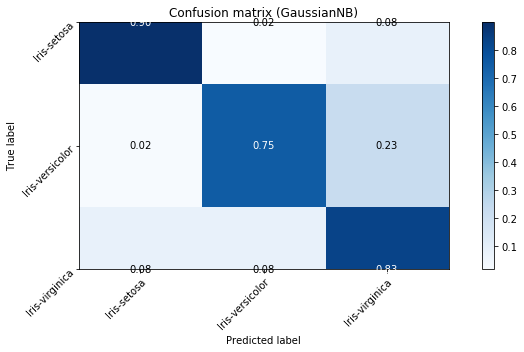

In [38]:
cross_validate(GaussianNB, KFold(5), X, y)

/Users/giedrius/anaconda3/envs/scipy/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for MultinomialNB
----
  Accuracy:  0.398876404494382
  Precision: 0.13295880149812733
  Recall:    0.3333333333333333
  F1 score:  0.19009370816599733
  Mislabeled 107 out of 178




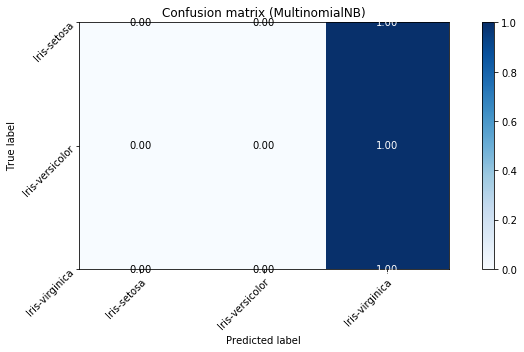

In [39]:
cross_validate(MultinomialNB, StratifiedKFold(5), X, y)

Now do the same for the glass set

And what is this discretization useful for? Let's check it out!

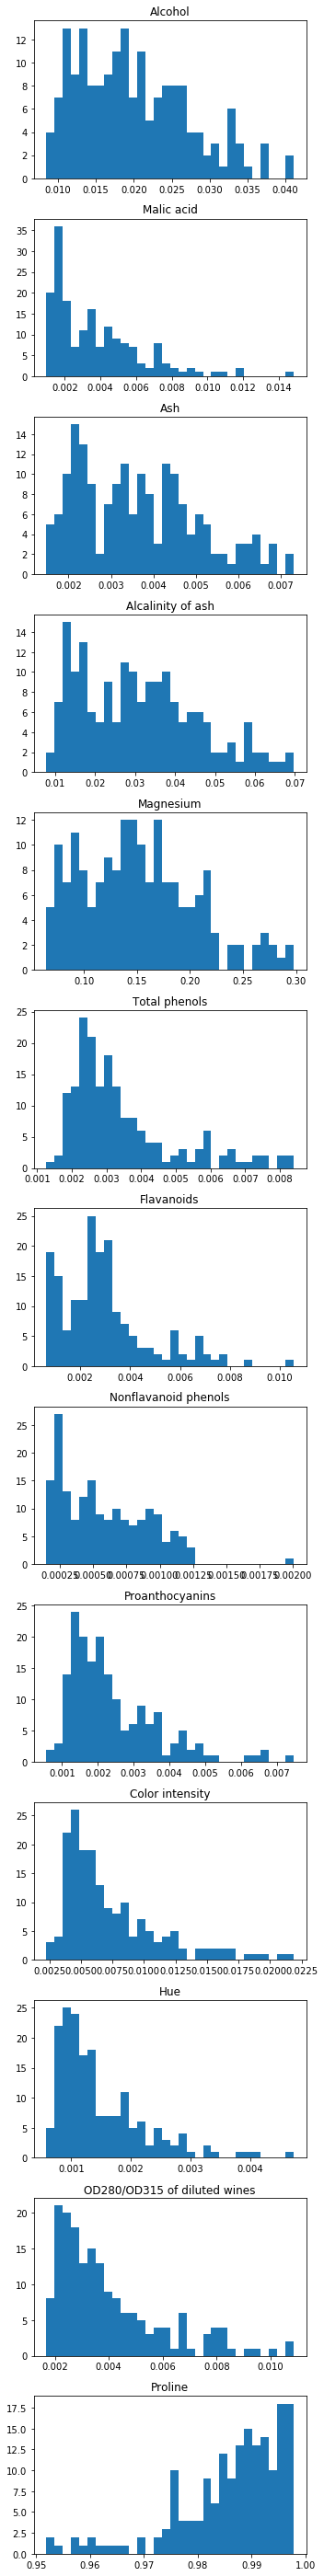

In [40]:
fig, axs = plt.subplots(len(X.columns), figsize=(5, len(X.columns)*3))
for index, column in enumerate(X):
    axs[index].hist(X[column], bins=30)
    axs[index].set_title(column)
plt.tight_layout()
plt.show()

Let's define the various functions for discretization

In [41]:
def equal_length(column, n_bins):
    # pandas method to divide a set of equal length (frequency)
    indices, bins = pd.cut(column, n_bins, labels=False, retbins=True, duplicates='drop')
    return indices.map(dict(enumerate(bins)))

def equal_frequency(column, n_bins):
    # pandas method to divide a set into the same fraction (frequency)
    indices, bins = pd.qcut(column, n_bins, labels=False, retbins=True, duplicates='drop') 
    return indices.map(dict(enumerate(bins)))

def automatic_binning(column):
    # the division into intervals depends on the histogram
    _, bins = np.histogram(column, bins='fd')
    indices = pd.Series(np.digitize(column, bins) - 1)
    return indices.map(dict(enumerate(bins)))

length_binning = lambda x: equal_length(x, 5)
freq_binning = lambda x: equal_frequency(x, 5)

In [42]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482


In [43]:
X_l = X.apply(length_binning)
X_f = X.apply(freq_binning)
X_a = X.apply(automatic_binning)

In [44]:
X_a

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.012059,0.000944,0.002202,0.007739,0.116105,0.002276,0.002497,0.000145,0.001618,0.005046,0.000876,0.003206,0.989467
1,0.012059,0.000944,0.001473,0.007739,0.090126,0.002276,0.002497,0.000145,0.001086,0.003644,0.000876,0.003206,0.993651
2,0.008428,0.000944,0.002202,0.015485,0.064147,0.002276,0.002497,0.000145,0.002150,0.003644,0.000579,0.002440,0.993651
3,0.008428,0.000944,0.001473,0.007739,0.064147,0.002276,0.001877,0.000145,0.001086,0.005046,0.000579,0.001675,0.993651
4,0.015690,0.003262,0.003660,0.023230,0.142084,0.003298,0.003117,0.000518,0.002150,0.005046,0.001172,0.003206,0.985283
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.015690,0.006739,0.002931,0.023230,0.116105,0.001766,0.000637,0.000518,0.001086,0.009254,0.000579,0.001675,0.989467
174,0.015690,0.004421,0.002931,0.023230,0.116105,0.002276,0.000637,0.000518,0.001618,0.009254,0.000876,0.001675,0.989467
175,0.015690,0.004421,0.002202,0.023230,0.142084,0.001766,0.000637,0.000331,0.001086,0.012059,0.000579,0.001675,0.985283
176,0.012059,0.002103,0.002202,0.023230,0.116105,0.001766,0.000637,0.000518,0.001618,0.010656,0.000579,0.001675,0.989467


Results for GaussianNB
----
  Accuracy:  0.8595505617977528
  Precision: 0.8635549038774846
  Recall:    0.8576082199411156
  F1 score:  0.8598496365294785
  Mislabeled 25 out of 178




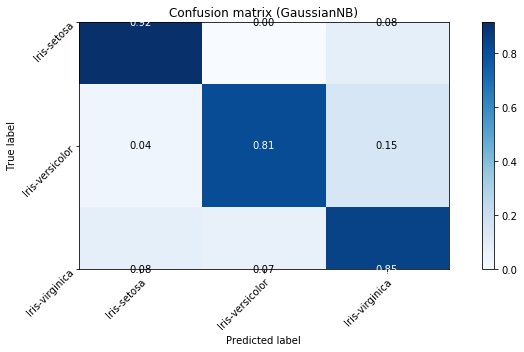

In [45]:
cross_validate(GaussianNB, StratifiedKFold(5), X_l, y)

Results for GaussianNB
----
  Accuracy:  0.8932584269662921
  Precision: 0.89603366770437
  Recall:    0.8983200047744092
  F1 score:  0.8971294544141698
  Mislabeled 19 out of 178




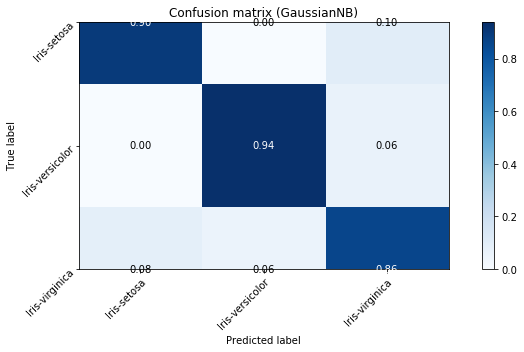

In [46]:
cross_validate(GaussianNB, StratifiedKFold(5), X, y)

Results for GaussianNB
----
  Accuracy:  0.8876404494382022
  Precision: 0.8947947214076247
  Recall:    0.8868763428025782
  F1 score:  0.8900651390769968
  Mislabeled 20 out of 178




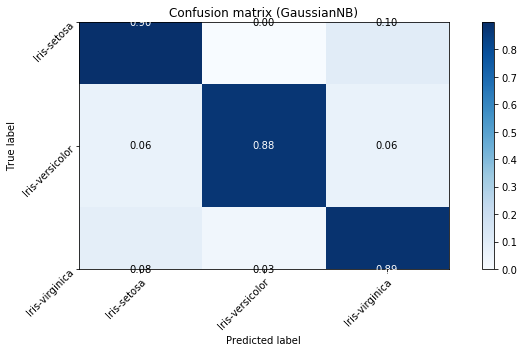

In [47]:
cross_validate(GaussianNB, StratifiedKFold(5), X_f, y)

Results for GaussianNB
----
  Accuracy:  0.8932584269662921
  Precision: 0.8929240131065689
  Recall:    0.8992748866077823
  F1 score:  0.8954620918649696
  Mislabeled 19 out of 178




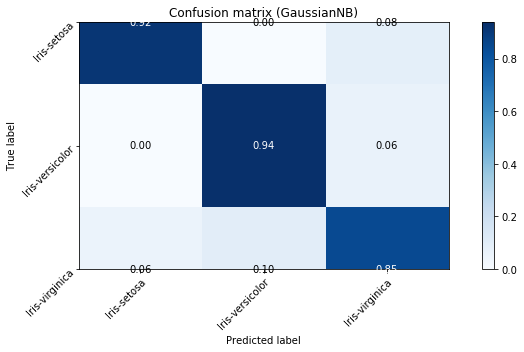

In [48]:
cross_validate(GaussianNB, StratifiedKFold(5), X_a, y)